In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import os

In [ ]:
# Change to your own directory
try:
    os.chdir("/content/drive/MyDrive/Suicide")
    print("Directory changed")
except OSError:
    print("Error: Can't change the Current Working Directory")

Directory changed


In [ ]:
# loading in all the essentials
import pandas as pd
import numpy as np 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk import ngrams
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Load dataset
cleaned_df = pd.read_csv('New Data/suicide_full_cleaned.csv') 
cleaned_df

,text,class,cleaned_text
0,I recently went through a breakup and she said...,depression,recently go breakup say want friend say try ta...
1,"I do not know how to navigate these feelings, ...",depression,not know navigate feeling not new feeling stre...
2,"So I have been with my bf for 5 months , and h...",depression,month tell depressed week particular happen fe...
3,I am so exhausted of this. Just when I think I...,suicide,exhausted think finally rest think maybe thing...
4,i could feel the strongest connection and stil...,normal,feel strong connection divine self
...,...,...,...
30784,i get the more confident i feel about being we...,normal,confident feel prepared graduate
30785,i sat there in our living room feeling the sun...,normal,sit living room feel sun come window cuddle go...
30786,i still feel incredibly listless being in albu...,normal,feel incredibly listless albuquerque weather i...
30787,i feel that is how we can be safe to be oursel...,normal,feel safe trust


In [ ]:
cleaned_df.dtypes

                                                                           text    object
    class                                                                          object
cleaned_text                                                                       object
dtype: object

In [ ]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30789 entries, 0 to 30788
Data columns (total 3 columns):
 #   Column                                                                           Non-Null Count  Dtype 
---  ------                                                                           --------------  ----- 
 0                                                                              text  30789 non-null  object
 1       class                                                                        30788 non-null  object
 2   cleaned_text                                                                     30785 non-null  object
dtypes: object(3)
memory usage: 721.7+ KB


In [ ]:
cleaned_df.shape

(30789, 3)

In [ ]:
# let joins all the title rows and tokenize them into words
comments ="".join(str(cleaned_df['                                                                           text']))
words =word_tokenize(comments)

In [ ]:
comments

'0        I recently went through a breakup and she said...\n1        I do not know how to navigate these feelings, ...\n2        So I have been with my bf for 5 months , and h...\n3        I am so exhausted of this. Just when I think I...\n4        i could feel the strongest connection and stil...\n                               ...                        \n30784    i get the more confident i feel about being we...\n30785    i sat there in our living room feeling the sun...\n30786    i still feel incredibly listless being in albu...\n30787    i feel that is how we can be safe to be oursel...\n30788    i ask you how can they feel virtuous if any me...\nName:                                                                            text, Length: 30789, dtype: object'

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
#lets creat a small function to clean the words of punctuations, stop words and lemmatize the words
def clean_words(new_tokens):
    new_tokens = [t.lower() for t in new_tokens]
    new_tokens =[t for t in new_tokens if t not in stopwords.words('english')]
    new_tokens = [t for t in new_tokens if t.isalpha()]
    lemmatizer = WordNetLemmatizer()
    new_tokens =[lemmatizer.lemmatize(t) for t in new_tokens]
    return new_tokens

In [ ]:
lowered = clean_words(words)

In [ ]:
bow = Counter(lowered)
bow

Counter({'recently': 1,
         'went': 1,
         'breakup': 1,
         'said': 1,
         'know': 1,
         'navigate': 1,
         'feeling': 2,
         'bf': 1,
         'month': 1,
         'h': 1,
         'exhausted': 1,
         'think': 1,
         'could': 1,
         'feel': 5,
         'strongest': 1,
         'connection': 1,
         'stil': 1,
         'get': 1,
         'confident': 1,
         'sat': 1,
         'living': 1,
         'room': 1,
         'sun': 1,
         'still': 1,
         'incredibly': 1,
         'listless': 1,
         'albu': 1,
         'safe': 1,
         'oursel': 1,
         'ask': 1,
         'virtuous': 1,
         'name': 1,
         'text': 1,
         'length': 1,
         'dtype': 1,
         'object': 1})

In [ ]:
data = pd.DataFrame(bow.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)

In [ ]:
data =data.head(20)

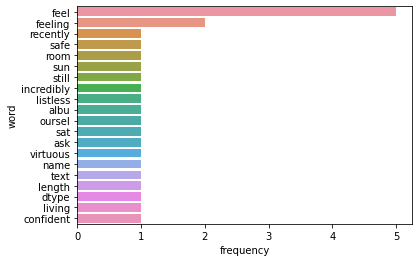

In [ ]:
sns.barplot(x='frequency',y='word',data=data)

In [ ]:
bow2 =Counter(ngrams(lowered,2))
bow2

Counter({('recently', 'went'): 1,
         ('went', 'breakup'): 1,
         ('breakup', 'said'): 1,
         ('said', 'know'): 1,
         ('know', 'navigate'): 1,
         ('navigate', 'feeling'): 1,
         ('feeling', 'bf'): 1,
         ('bf', 'month'): 1,
         ('month', 'h'): 1,
         ('h', 'exhausted'): 1,
         ('exhausted', 'think'): 1,
         ('think', 'could'): 1,
         ('could', 'feel'): 1,
         ('feel', 'strongest'): 1,
         ('strongest', 'connection'): 1,
         ('connection', 'stil'): 1,
         ('stil', 'get'): 1,
         ('get', 'confident'): 1,
         ('confident', 'feel'): 1,
         ('feel', 'sat'): 1,
         ('sat', 'living'): 1,
         ('living', 'room'): 1,
         ('room', 'feeling'): 1,
         ('feeling', 'sun'): 1,
         ('sun', 'still'): 1,
         ('still', 'feel'): 1,
         ('feel', 'incredibly'): 1,
         ('incredibly', 'listless'): 1,
         ('listless', 'albu'): 1,
         ('albu', 'feel'): 1,
         ('f

In [ ]:
def word_frequency(sentence):
    sentence =" ".join(sentence)
    new_tokens = word_tokenize(sentence)
    new_tokens = [t.lower() for t in new_tokens]
    new_tokens =[t for t in new_tokens if t not in stopwords.words('english')]
    new_tokens = [t for t in new_tokens if t.isalpha()]
    lemmatizer = WordNetLemmatizer()
    new_tokens =[lemmatizer.lemmatize(t) for t in new_tokens]
    counted = Counter(new_tokens)
    counted_2= Counter(ngrams(new_tokens,2))
    counted_3= Counter(ngrams(new_tokens,3))
    word_freq = pd.DataFrame(counted.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)
    word_pairs =pd.DataFrame(counted_2.items(),columns=['pairs','frequency']).sort_values(by='frequency',ascending=False)
    trigrams =pd.DataFrame(counted_3.items(),columns=['trigrams','frequency']).sort_values(by='frequency',ascending=False)
    return word_freq,word_pairs,trigrams
    

In [ ]:
data2,data3,data4 = word_frequency(cleaned_df['                                                                           text'])

In [ ]:
data4

,trigrams,frequency
184003,"(take, anymore, take)",1562
338949,"(anymore, take, anymore)",1561
8987,"(want, die, want)",447
43337,"(die, want, die)",275
5075,"(make, feel, like)",250
...,...,...
482460,"(go, pick, buy)",1
482459,"(scared, go, pick)",1
482458,"(monster, scared, go)",1
482457,"(bye, monster, scared)",1


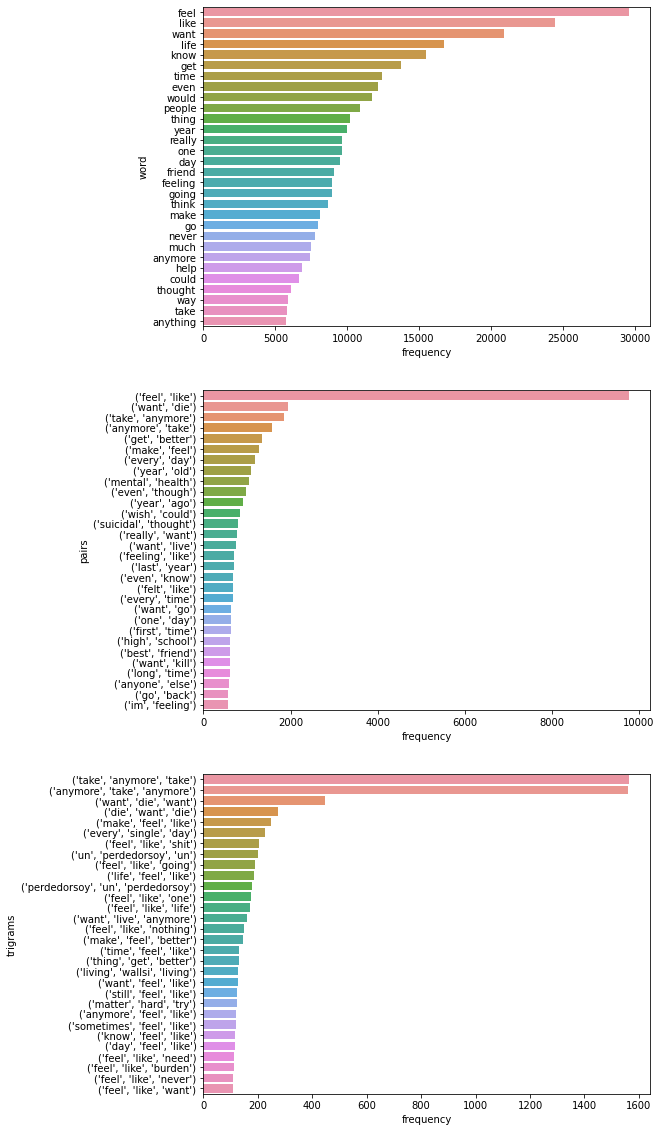

In [ ]:
fig, axes = plt.subplots(3,1,figsize=(8,20))
sns.barplot(ax=axes[0],x='frequency',y='word',data=data2.head(30))
sns.barplot(ax=axes[1],x='frequency',y='pairs',data=data3.head(30))
sns.barplot(ax=axes[2],x='frequency',y='trigrams',data=data4.head(30))

In [ ]:
# Check dataset 
cleaned_df.head()

,text,class,cleaned_text
0,I recently went through a breakup and she said...,depression,recently go breakup say want friend say try ta...
1,"I do not know how to navigate these feelings, ...",depression,not know navigate feeling not new feeling stre...
2,"So I have been with my bf for 5 months , and h...",depression,month tell depressed week particular happen fe...
3,I am so exhausted of this. Just when I think I...,suicide,exhausted think finally rest think maybe thing...
4,i could feel the strongest connection and stil...,normal,feel strong connection divine self


In [ ]:
# Export cleaned dataset 
cleaned_df.to_csv('/content/drive/MyDrive/Suicide/New Data/suicide_final_cleaned.csv', index=False)